In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas_profiling

C:\Users\Anirudh Mathur\Anaconda2\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
df_telecom_active=pd.read_excel('C:\Users\Anirudh Mathur\Desktop\case studies\TELECOM CASE STUDY - SEGMENTATION-CLASSIFICATION\Active.xlsx')

In [3]:
df_telecom_active.dtypes

SITE_ACCOUNT_NUMBER                  object
ACCOUNT_STATUS                       object
FIRST_COMMUNICATION_DATE     datetime64[ns]
UPGRADE_DATE                 datetime64[ns]
SERVICE_ PLAN                        object
MODEL                                object
SALES_CHANNEL                        object
DIRECT_INDIRECT_CHANNEL              object
SALES_SOURCE                         object
COMPANY_SOURCE_NAME                  object
FIRST_NAME                           object
LAST_NAME                            object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIPCODE                              object
EMAIL_ADDRESS                        object
FEEDBACK                             object
SATELLITE                            object
SITE_TYPE_DESC                       object
WARRANTY_NAME                        object
MOST_RECENT_SALES_CHANNEL            object
GENDER                          

In [4]:
df_telecom_churn=pd.read_excel('C:\Users\Anirudh Mathur\Desktop\case studies\TELECOM CASE STUDY - SEGMENTATION-CLASSIFICATION\Churn.xlsx')

In [5]:
df_telecom_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9998 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8760 non-null object
MODEL                        9323 non-null object
SALES_CHANNEL                7093 non-null object
DIRECT_INDIRECT_CHANNEL      9954 non-null object
SALES_SOURCE                 9306 non-null object
COMPANY_SOURCE_NAME          9988 non-null object
FIRST_NAME                   9998 non-null object
LAST_NAME                    9998 non-null object
ADDRESS                      9945 non-null object
CITY                         9998 non-null object
STATE                        9977 non-null object
ZIPCODE                      9977 non-null object
EMAIL_ADDRESS                9979 non-null object
FEEDBACK                   

In [6]:
df_telecom_active.describe()

,GENDER,MARITAL_STATUS,PRESENCE_OF_CHILDREN
count,8728.000000,9680.000000,8684.000000
mean,1.454056,0.572521,0.235030
std,0.497913,0.592780,0.424042
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


In [7]:
df_telecom_active.columns[df_telecom_active.isnull().any()]

Index([u'SITE_ACCOUNT_NUMBER', u'ACCOUNT_STATUS', u'FIRST_COMMUNICATION_DATE',
       u'UPGRADE_DATE', u'SERVICE_ PLAN', u'MODEL', u'SALES_CHANNEL',
       u'DIRECT_INDIRECT_CHANNEL', u'SALES_SOURCE', u'COMPANY_SOURCE_NAME',
       u'FIRST_NAME', u'LAST_NAME', u'ADDRESS', u'CITY', u'STATE', u'ZIPCODE',
       u'EMAIL_ADDRESS', u'FEEDBACK', u'SATELLITE', u'SITE_TYPE_DESC',
       u'WARRANTY_NAME', u'MOST_RECENT_SALES_CHANNEL', u'GENDER',
       u'DATE_OF_BIRTH', u'AGE', u'INCOME', u'MARITAL_STATUS',
       u'PRESENCE_OF_CHILDREN', u'COMPUTER_OWNER'],
      dtype='object')

In [8]:
df_telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
SITE_ACCOUNT_NUMBER          10000 non-null object
ACCOUNT_STATUS               9985 non-null object
FIRST_COMMUNICATION_DATE     10000 non-null datetime64[ns]
CHURN_DATE                   10000 non-null datetime64[ns]
UPGRADE_DATE                 9121 non-null datetime64[ns]
SERVICE_PLAN                 8518 non-null object
MODEL                        9290 non-null object
SALES_CHANNEL                7398 non-null object
DIRECT_INDIRECT_CHANNEL      9216 non-null object
SALES_SOURCE                 9710 non-null object
COMPANY_SOURCE_NAME          9992 non-null object
FIRST_NAME                   9974 non-null object
LAST_NAME                    9993 non-null object
ADDRESS                      9991 non-null object
CITY                         10000 non-null object
STATE                        9955 non-null object
ZIPCODE                      9955 non-null object
EMAIL_ADDRESS 

In [9]:
df_telecom_churn.describe()

,GENDER,AGE,PRESENCE_OF_CHILDREN
count,8762.000000,9992.000000,8748.00000
mean,1.431408,49.556545,0.38043
std,0.495301,14.271563,0.48552
min,1.000000,22.000000,0.00000
25%,1.000000,38.000000,0.00000
50%,1.000000,50.000000,0.00000
75%,2.000000,61.000000,1.00000
max,2.000000,90.000000,1.00000


In [10]:
# Deriving new variable subscription period :how long customers were subscribed 
df_telecom_churn['Sub_period']=df_telecom_churn['CHURN_DATE']-df_telecom_churn['FIRST_COMMUNICATION_DATE']

In [11]:
df_telecom_churn['Sub_period'].head()

0   1535 days
1   1649 days
2   2550 days
3    957 days
4   1685 days
Name: Sub_period, dtype: timedelta64[ns]

In [12]:
# converting Sub_period into integer 
df_telecom_churn['Sub_period']=df_telecom_churn['Sub_period'].apply(lambda x: x.days)

In [13]:
df_telecom_churn['Sub_period'].head()

0    1535
1    1649
2    2550
3     957
4    1685
Name: Sub_period, dtype: int64

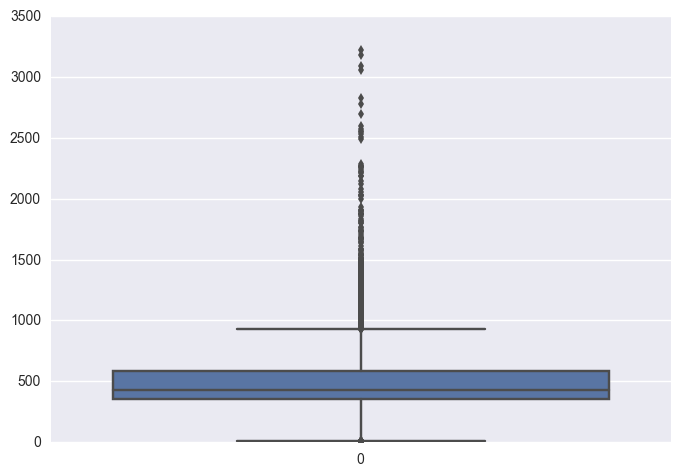

In [14]:
sns.boxplot(data=df_telecom_churn['Sub_period'])

In [15]:
# Univariate Analysis : MODEL
df_telecom_churn.MODEL.value_counts()

HN9000     2850
HN7000S    1899
DW4000     1618
DW7000     1500
DW6000     1380
UNK          43
Name: MODEL, dtype: int64

In [16]:
df_telecom_churn.MODEL.isnull().value_counts()

False    9290
True      710
Name: MODEL, dtype: int64

In [17]:
# SALES CHANNEL
df_telecom_churn.SALES_CHANNEL.value_counts()

Call Centers     1675
Retail/Others    1576
Web Orders       1419
Sales Agents     1371
Vars             1357
Name: SALES_CHANNEL, dtype: int64

In [18]:
df_telecom_churn.SALES_CHANNEL.isnull().value_counts()

False    7398
True     2602
Name: SALES_CHANNEL, dtype: int64

In [19]:
df_telecom_churn.DIRECT_INDIRECT_CHANNEL.isnull().value_counts()

False    9216
True      784
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [20]:
df_telecom_churn.DIRECT_INDIRECT_CHANNEL.value_counts()

Indirect    6411
Direct      2805
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [21]:
pd.crosstab(df_telecom_churn.SALES_CHANNEL,df_telecom_churn.DIRECT_INDIRECT_CHANNEL,margins=True)

DIRECT_INDIRECT_CHANNEL,Direct,Indirect,All
SALES_CHANNEL,,,
Call Centers,476,1185,1661
Retail/Others,446,1126,1572
Sales Agents,384,977,1361
Vars,402,944,1346
Web Orders,393,1018,1411
All,2101,5250,7351


In [22]:
from scipy.stats import chi2_contingency

In [23]:
chi2_contingency?

In [24]:
chi2_contingency(pd.crosstab(df_telecom_churn.SALES_CHANNEL,df_telecom_churn.DIRECT_INDIRECT_CHANNEL))

(1.584142852133579,
 0.8116392962033514,
 4L,
 array([[  474.73282547,  1186.26717453],
        [  449.29560604,  1122.70439396],
        [  388.9893892 ,   972.0106108 ],
        [  384.70221739,   961.29778261],
        [  403.27996191,  1007.72003809]]))

## It shows that Sales channel and direct_indirect channel has no relationship.

In [25]:
chi2_contingency(pd.crosstab(df_telecom_churn.SALES_CHANNEL,df_telecom_churn.MODEL))

(1846.1224230581781,
 0.0,
 20L,
 array([[ 229.17650531,  198.90791027,  213.60979929,  293.82157615,
          521.91706021,    7.56714876],
        [ 239.81404959,  208.14049587,  223.52479339,  307.45971074,
          546.14256198,    7.91838843],
        [ 189.75501771,  164.69303424,  176.86599764,  243.28025384,
          432.14020071,    6.26549587],
        [ 197.42030697,  171.3459268 ,  184.01062574,  253.10773318,
          449.59681228,    6.51859504],
        [ 203.83412043,  176.91263282,  189.98878394,  261.33072609,
          464.20336482,    6.7303719 ]]))

##  It shows that Sales_Channel & Model have relationship: so we can use one variable 

In [26]:
# Company source
df_telecom_churn.COMPANY_SOURCE_NAME.value_counts()

HNS Customers    9992
Name: COMPANY_SOURCE_NAME, dtype: int64

In [27]:
# Sales source
df_telecom_churn.SALES_SOURCE.value_counts()

TAG                                        1191
Red Ventures LLC (SA)                      1092
DialAmerica Marketing Inc (CC)              647
Communication Solutions LLC (CC)            623
OKS Ameridial Inc (CC)                      586
Hughes Web Order                            568
LiveBridge Communications LLC               523
I-Dish.com LLC (SA)                         405
ALORAD Inc (SA)                             382
ACS                                         376
NationWide Satellite (SA)                   335
ACS Pre-Install                             162
Electronic Express (SA)                     131
RS&I                                        123
EBN Financial dba Dish Systems (SA)         118
Best Buy                                    107
AmericanSat                                 106
Elite Satellite and Home Theater Inc (S     105
Buy Telco                                    95
Perfect 10                                   94
GoDish.com Ltd LLP (SA)                 

In [28]:
# SITE_TYPE_DESC
df_telecom_churn.SITE_TYPE_DESC.value_counts()

Spaceway            6113
Broadband Remote    3824
Name: SITE_TYPE_DESC, dtype: int64

In [29]:
# feedback
df_telecom_churn.FEEDBACK.value_counts()

BAD     5053
GOOD    2919
Name: FEEDBACK, dtype: int64

In [30]:
# Marital stats
df_telecom_churn.MARITAL_STATUS.isnull().value_counts()

False    9719
True      281
Name: MARITAL_STATUS, dtype: int64

In [31]:
# Marital stats
df_telecom_churn.MARITAL_STATUS.head()

0    .
1    0
2    1
3    .
4    0
Name: MARITAL_STATUS, dtype: object

In [32]:
df_telecom_churn.MARITAL_STATUS.value_counts()

.    3341
0    3053
1    2841
2     484
Name: MARITAL_STATUS, dtype: int64

In [33]:
df_telecom_active.MARITAL_STATUS.value_counts()

0.0    4654
1.0    4510
2.0     516
Name: MARITAL_STATUS, dtype: int64

### since marital status values are not consistent we do not take into consideration while building a model

In [34]:
# Computer own
df_telecom_churn.COMPUTER_OWNER.value_counts()

Y    3932
N    2825
Name: COMPUTER_OWNER, dtype: int64

In [35]:
df_telecom_active.COMPUTER_OWNER.value_counts()

N    5819
Y    1125
Name: COMPUTER_OWNER, dtype: int64

In [36]:
# Presence of children
df_telecom_churn.PRESENCE_OF_CHILDREN.value_counts()

0.0    5420
1.0    3328
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [37]:
# Presence of children
df_telecom_active.PRESENCE_OF_CHILDREN.value_counts()

0.0    6643
1.0    2041
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [38]:
df_telecom_active.columns

Index([u'SITE_ACCOUNT_NUMBER', u'ACCOUNT_STATUS', u'FIRST_COMMUNICATION_DATE',
       u'UPGRADE_DATE', u'SERVICE_ PLAN', u'MODEL', u'SALES_CHANNEL',
       u'DIRECT_INDIRECT_CHANNEL', u'SALES_SOURCE', u'COMPANY_SOURCE_NAME',
       u'FIRST_NAME', u'LAST_NAME', u'ADDRESS', u'CITY', u'STATE', u'ZIPCODE',
       u'EMAIL_ADDRESS', u'FEEDBACK', u'SATELLITE', u'SITE_TYPE_DESC',
       u'WARRANTY_NAME', u'MOST_RECENT_SALES_CHANNEL', u'GENDER',
       u'DATE_OF_BIRTH', u'AGE', u'INCOME', u'MARITAL_STATUS',
       u'PRESENCE_OF_CHILDREN', u'COMPUTER_OWNER'],
      dtype='object')

In [39]:
df_telecom_active['SERVICE_ PLAN'].value_counts()

Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
Pro          1210
Name: SERVICE_ PLAN, dtype: int64

In [40]:
df_telecom_churn.SERVICE_PLAN.isnull().value_counts()

False    8518
True     1482
Name: SERVICE_PLAN, dtype: int64

In [41]:
df_telecom_churn.SERVICE_PLAN.value_counts()

Elite                1795
SO                   1184
Home                 1122
Professional          780
Basic_Ltd             666
Proplus               664
Power15               624
Basic                 623
Pro                   555
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

In [42]:
df_telecom_churn.WARRANTY_NAME.value_counts()

0                                               6116
EXPRESS REPAIR BASIC                            2472
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          298
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

In [43]:
df_telecom_churn.columns

Index([      u'SITE_ACCOUNT_NUMBER',            u'ACCOUNT_STATUS',
        u'FIRST_COMMUNICATION_DATE',                u'CHURN_DATE',
                    u'UPGRADE_DATE',              u'SERVICE_PLAN',
                           u'MODEL',             u'SALES_CHANNEL',
         u'DIRECT_INDIRECT_CHANNEL',              u'SALES_SOURCE',
             u'COMPANY_SOURCE_NAME',                u'FIRST_NAME',
                       u'LAST_NAME',                   u'ADDRESS',
                            u'CITY',                     u'STATE',
                         u'ZIPCODE',             u'EMAIL_ADDRESS',
                        u'FEEDBACK',                 u'SATELLITE',
                  u'SITE_TYPE_DESC',             u'WARRANTY_NAME',
       u'MOST_RECENT_SALES_CHANNEL',                    u'GENDER',
                   u'DATE_OF_BIRTH',                       u'AGE',
                          u'INCOME',            u'MARITAL_STATUS',
            u'PRESENCE_OF_CHILDREN',            u'COMPUTER_OWN

In [44]:
drop_col_list=['SITE_ACCOUNT_NUMBER','ACCOUNT_STATUS','FIRST_COMMUNICATION_DATE','CHURN_DATE','UPGRADE_DATE','COMPANY_SOURCE_NAME',
         'SALES_CHANNEL','COMPANY_SOURCE_NAME','FIRST_NAME','LAST_NAME','ADDRESS','CITY','ZIPCODE','EMAIL_ADDRESS',
         'WARRANTY_NAME','MOST_RECENT_SALES_CHANNEL','MARITAL_STATUS']

In [45]:
df_telecom_churn_drop=df_telecom_churn.drop(drop_col_list,axis=1)

In [46]:
df_telecom_churn_drop.AGE.fillna(df_telecom_churn_drop.AGE.mean(),inplace=True)
df_telecom_churn_drop.AGE=df_telecom_churn_drop.AGE.astype('int')

In [47]:
df_telecom_churn_drop.drop('DATE_OF_BIRTH',axis=1,inplace=True)

In [48]:
df_telecom_churn_drop.GENDER.value_counts()

1.0    4982
2.0    3780
Name: GENDER, dtype: int64

In [49]:
df_telecom_churn_drop.GENDER.fillna(1.0,inplace=True)
df_telecom_churn_drop.GENDER=df_telecom_churn_drop.GENDER.astype('object')

In [50]:
df_telecom_churn_drop['CHURN']=1

df_telecom_churn_drop.CHURN=df_telecom_churn_drop.CHURN


In [51]:
df_telecom_churn_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
SERVICE_PLAN               8518 non-null object
MODEL                      9290 non-null object
DIRECT_INDIRECT_CHANNEL    9216 non-null object
SALES_SOURCE               9710 non-null object
STATE                      9955 non-null object
FEEDBACK                   7972 non-null object
SATELLITE                  8987 non-null object
SITE_TYPE_DESC             9937 non-null object
GENDER                     10000 non-null object
AGE                        10000 non-null int32
INCOME                     10000 non-null object
PRESENCE_OF_CHILDREN       8748 non-null float64
COMPUTER_OWNER             6757 non-null object
Sub_period                 10000 non-null int64
CHURN                      10000 non-null int64
dtypes: float64(1), int32(1), int64(2), object(11)
memory usage: 1.1+ MB


## Now preparing data for active customers

In [52]:
df_telecom_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9998 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8760 non-null object
MODEL                        9323 non-null object
SALES_CHANNEL                7093 non-null object
DIRECT_INDIRECT_CHANNEL      9954 non-null object
SALES_SOURCE                 9306 non-null object
COMPANY_SOURCE_NAME          9988 non-null object
FIRST_NAME                   9998 non-null object
LAST_NAME                    9998 non-null object
ADDRESS                      9945 non-null object
CITY                         9998 non-null object
STATE                        9977 non-null object
ZIPCODE                      9977 non-null object
EMAIL_ADDRESS                9979 non-null object
FEEDBACK                   

#### we have to find subscription period and we'll drop first_comm_date and Upgrade_date rows with null values

In [53]:
index=df_telecom_active.loc[df_telecom_active.FIRST_COMMUNICATION_DATE.isnull(),:].index

In [54]:
df_telecom_active.drop(index,axis=0,inplace=True)

In [55]:
df_telecom_active.shape


(9989, 29)

In [56]:
df_telecom_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9997
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9989 non-null object
ACCOUNT_STATUS               9989 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8753 non-null object
MODEL                        9315 non-null object
SALES_CHANNEL                7088 non-null object
DIRECT_INDIRECT_CHANNEL      9945 non-null object
SALES_SOURCE                 9297 non-null object
COMPANY_SOURCE_NAME          9979 non-null object
FIRST_NAME                   9989 non-null object
LAST_NAME                    9989 non-null object
ADDRESS                      9936 non-null object
CITY                         9989 non-null object
STATE                        9968 non-null object
ZIPCODE                      9968 non-null object
EMAIL_ADDRESS                9970 non-null object
FEEDBACK                   

In [57]:
df_telecom_active['SERVICE_PLAN']=df_telecom_active['SERVICE_ PLAN']

In [58]:
df_telecom_active.SERVICE_PLAN.value_counts()


Proplus      1271
Basic_Ltd    1268
Basic        1262
Elite        1255
Power150     1246
Home         1243
Pro          1208
Name: SERVICE_PLAN, dtype: int64

In [59]:
df_telecom_active.SERVICE_PLAN.isnull().value_counts()


False    8753
True     1236
Name: SERVICE_PLAN, dtype: int64

In [60]:
df_telecom_active.drop('SERVICE_ PLAN',axis=1,inplace=True)

In [61]:
df_telecom_active['Sub_period']=df_telecom_active.UPGRADE_DATE - df_telecom_active.FIRST_COMMUNICATION_DATE

In [62]:
df_telecom_active.Sub_period=df_telecom_active.Sub_period.apply(lambda x: x.days)

In [63]:
drop_col_list_active=['SITE_ACCOUNT_NUMBER','ACCOUNT_STATUS','FIRST_COMMUNICATION_DATE','UPGRADE_DATE','COMPANY_SOURCE_NAME',
         'SALES_CHANNEL','COMPANY_SOURCE_NAME','FIRST_NAME','LAST_NAME','ADDRESS','CITY','ZIPCODE','EMAIL_ADDRESS',
         'WARRANTY_NAME','MOST_RECENT_SALES_CHANNEL','MARITAL_STATUS']

In [64]:
df_telecom_active_drop=df_telecom_active.drop(drop_col_list_active,axis=1)

In [65]:
df_telecom_active_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9997
Data columns (total 15 columns):
MODEL                      9315 non-null object
DIRECT_INDIRECT_CHANNEL    9945 non-null object
SALES_SOURCE               9297 non-null object
STATE                      9968 non-null object
FEEDBACK                   8077 non-null object
SATELLITE                  9594 non-null object
SITE_TYPE_DESC             9979 non-null object
GENDER                     8719 non-null float64
DATE_OF_BIRTH              9989 non-null object
AGE                        9989 non-null object
INCOME                     9672 non-null object
PRESENCE_OF_CHILDREN       8677 non-null float64
COMPUTER_OWNER             6938 non-null object
SERVICE_PLAN               8753 non-null object
Sub_period                 9989 non-null int64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.2+ MB


In [66]:
df_telecom_active_drop.drop('DATE_OF_BIRTH',axis=1,inplace=True)

In [67]:
df_telecom_active_drop.AGE.isnull().value_counts()


False    9989
Name: AGE, dtype: int64

In [68]:
mode_age=df_telecom_active_drop.AGE.mode()[0]

In [69]:
df_telecom_active_drop.loc[df_telecom_active_drop.AGE=='.','AGE']=mode_age

In [70]:
df_telecom_active_drop.AGE=df_telecom_active_drop.AGE.astype('int')

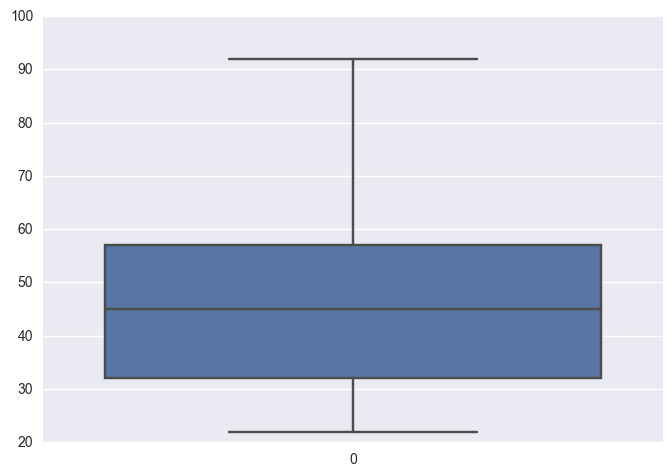

In [71]:
sns.boxplot(data=df_telecom_active_drop.AGE)

In [72]:
df_telecom_active_drop.AGE.isnull().any()

False

In [73]:
df_telecom_active_drop.PRESENCE_OF_CHILDREN.value_counts()

0.0    6642
1.0    2035
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [74]:
df_telecom_active_drop.PRESENCE_OF_CHILDREN.fillna(0.0,inplace=True)

In [75]:
df_telecom_active_drop.PRESENCE_OF_CHILDREN=df_telecom_active_drop.PRESENCE_OF_CHILDREN.astype('object')

In [76]:
df_telecom_active_drop.GENDER.fillna(1.0,inplace=True)
df_telecom_active_drop.GENDER=df_telecom_active_drop.GENDER.astype('object')

In [77]:
df_telecom_active_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9997
Data columns (total 14 columns):
MODEL                      9315 non-null object
DIRECT_INDIRECT_CHANNEL    9945 non-null object
SALES_SOURCE               9297 non-null object
STATE                      9968 non-null object
FEEDBACK                   8077 non-null object
SATELLITE                  9594 non-null object
SITE_TYPE_DESC             9979 non-null object
GENDER                     9989 non-null object
AGE                        9989 non-null int32
INCOME                     9672 non-null object
PRESENCE_OF_CHILDREN       9989 non-null object
COMPUTER_OWNER             6938 non-null object
SERVICE_PLAN               8753 non-null object
Sub_period                 9989 non-null int64
dtypes: int32(1), int64(1), object(12)
memory usage: 1.1+ MB


In [78]:
df_telecom_active_drop['CHURN']=0

df_telecom_active_drop.CHURN=df_telecom_active_drop.CHURN
df_telecom_active_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9997
Data columns (total 15 columns):
MODEL                      9315 non-null object
DIRECT_INDIRECT_CHANNEL    9945 non-null object
SALES_SOURCE               9297 non-null object
STATE                      9968 non-null object
FEEDBACK                   8077 non-null object
SATELLITE                  9594 non-null object
SITE_TYPE_DESC             9979 non-null object
GENDER                     9989 non-null object
AGE                        9989 non-null int32
INCOME                     9672 non-null object
PRESENCE_OF_CHILDREN       9989 non-null object
COMPUTER_OWNER             6938 non-null object
SERVICE_PLAN               8753 non-null object
Sub_period                 9989 non-null int64
CHURN                      9989 non-null int64
dtypes: int32(1), int64(2), object(12)
memory usage: 1.2+ MB


### Concatenating both datasets(active+churn)

In [79]:
df_telecom_final=pd.concat([df_telecom_active_drop,df_telecom_churn_drop],axis=0)

In [80]:
df_telecom_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19989 entries, 0 to 9999
Data columns (total 15 columns):
AGE                        19989 non-null int32
CHURN                      19989 non-null int64
COMPUTER_OWNER             13695 non-null object
DIRECT_INDIRECT_CHANNEL    19161 non-null object
FEEDBACK                   16049 non-null object
GENDER                     19989 non-null object
INCOME                     19672 non-null object
MODEL                      18605 non-null object
PRESENCE_OF_CHILDREN       18737 non-null object
SALES_SOURCE               19007 non-null object
SATELLITE                  18581 non-null object
SERVICE_PLAN               17271 non-null object
SITE_TYPE_DESC             19916 non-null object
STATE                      19923 non-null object
Sub_period                 19989 non-null int64
dtypes: int32(1), int64(2), object(12)
memory usage: 2.4+ MB


In [81]:
df_telecom_final.shape

(19989, 15)

In [82]:
df_telecom_final.columns

Index([                    u'AGE',                   u'CHURN',
                u'COMPUTER_OWNER', u'DIRECT_INDIRECT_CHANNEL',
                      u'FEEDBACK',                  u'GENDER',
                        u'INCOME',                   u'MODEL',
          u'PRESENCE_OF_CHILDREN',            u'SALES_SOURCE',
                     u'SATELLITE',            u'SERVICE_PLAN',
                u'SITE_TYPE_DESC',                   u'STATE',
                    u'Sub_period'],
      dtype='object')

In [83]:
df_telecom_final

,AGE,CHURN,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,INCOME,MODEL,PRESENCE_OF_CHILDREN,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_TYPE_DESC,STATE,Sub_period
0,69,0,N,Indirect,NaN,2,0,HN9000,0,UNKNOWN,SPACEWAY3,NaN,Broadband Remote,MD,747
1,43,0,N,Indirect,GOOD,2,4,HN7000S,0,NCC,HZN2-VER-4K,Pro,Spaceway,NJ,1194
2,58,0,N,Indirect,BAD,2,4,HN9000,0,NCC,SM5-VER-15K,Power150,Broadband Remote,LA,1144
3,22,0,NaN,Direct,NaN,1,6,DW6000,1,NaN,SPACEWAY3,Power150,Spaceway,OH,1223
4,36,0,NaN,Indirect,GOOD,1,7,HN7000S,0,TAG,0,Home,Broadband Remote,NY,838
5,51,0,NaN,Indirect,GOOD,2,7,HN9000,0,UNKNOWN,SPACEWAY3,Pro,Broadband Remote,TX,1254
6,56,0,NaN,Indirect,NaN,1,3,HN7000S,0,ValueElectronics,G17-HOR-2K,Power150,Broadband Remote,MO,561
7,57,0,Y,Indirect,GOOD,1,7,HN7000S,0,TAG,SM5-VER-5K,Power150,Broadband Remote,MD,919
8,42,0,NaN,Indirect,GOOD,2,4,DW6000,0,NaN,AM6-HOR-21K,Home,Broadband Remote,AR,1412
9,34,0,N,Indirect,BAD,2,4,HN7000S,1,Hughes Web Order,G17-HOR-6K,Basic_Ltd,Broadband Remote,MD,881


In [84]:
null_col=df_telecom_final.columns[df_telecom_final.isnull().any()]
null_col

Index([         u'COMPUTER_OWNER', u'DIRECT_INDIRECT_CHANNEL',
                      u'FEEDBACK',                  u'INCOME',
                         u'MODEL',    u'PRESENCE_OF_CHILDREN',
                  u'SALES_SOURCE',               u'SATELLITE',
                  u'SERVICE_PLAN',          u'SITE_TYPE_DESC',
                         u'STATE'],
      dtype='object')

In [85]:
for c in null_col:
    df_telecom_final[c].fillna(df_telecom_final[c].mode()[0],inplace=True)

In [86]:
df_telecom_final.isnull().any()

AGE                        False
CHURN                      False
COMPUTER_OWNER             False
DIRECT_INDIRECT_CHANNEL    False
FEEDBACK                   False
GENDER                     False
INCOME                     False
MODEL                      False
PRESENCE_OF_CHILDREN       False
SALES_SOURCE               False
SATELLITE                  False
SERVICE_PLAN               False
SITE_TYPE_DESC             False
STATE                      False
Sub_period                 False
dtype: bool

In [87]:
df_telecom_final.describe()

,AGE,CHURN,PRESENCE_OF_CHILDREN,Sub_period
count,19989.000000,19989.000000,19989.000000,19989.000000
mean,46.993296,0.500275,0.268298,773.487468
std,14.237425,0.500012,0.443084,390.297292
min,22.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,433.000000
50%,47.000000,1.000000,0.000000,717.000000
75%,58.000000,1.000000,1.000000,1100.000000
max,92.000000,1.000000,1.000000,3221.000000


In [88]:
df_telecom_final.PRESENCE_OF_CHILDREN.dtype

dtype('float64')

In [89]:
df_telecom_final.PRESENCE_OF_CHILDREN=df_telecom_final.PRESENCE_OF_CHILDREN.astype('int').astype('object')

In [90]:
df_telecom_final.describe()

,AGE,CHURN,Sub_period
count,19989.000000,19989.000000,19989.000000
mean,46.993296,0.500275,773.487468
std,14.237425,0.500012,390.297292
min,22.000000,0.000000,0.000000
25%,35.000000,0.000000,433.000000
50%,47.000000,1.000000,717.000000
75%,58.000000,1.000000,1100.000000
max,92.000000,1.000000,3221.000000


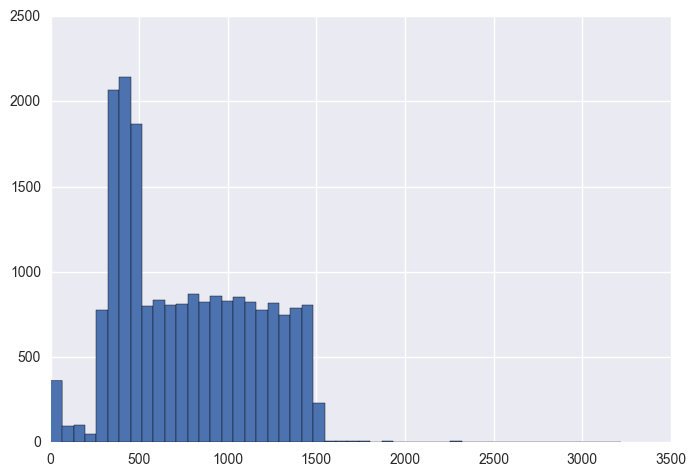

In [91]:
df_telecom_final.Sub_period.hist(bins=50)

### Converting Sub_period into categorical column

In [92]:
bins=pd.cut(df_telecom_final.Sub_period,4,labels=['Bin_'+str(i) for i in range(1,5)],retbins=True)

In [93]:
bins

(0       Bin_1
 1       Bin_2
 2       Bin_2
 3       Bin_2
 4       Bin_2
 5       Bin_2
 6       Bin_1
 7       Bin_2
 8       Bin_2
 9       Bin_2
 10      Bin_2
 11      Bin_2
 12      Bin_1
 13      Bin_2
 14      Bin_1
 15      Bin_1
 16      Bin_2
 17      Bin_2
 18      Bin_2
 19      Bin_2
 20      Bin_2
 21      Bin_1
 22      Bin_2
 23      Bin_2
 24      Bin_2
 25      Bin_2
 26      Bin_2
 27      Bin_2
 28      Bin_2
 29      Bin_2
         ...  
 9970    Bin_1
 9971    Bin_2
 9972    Bin_2
 9973    Bin_1
 9974    Bin_1
 9975    Bin_1
 9976    Bin_1
 9977    Bin_2
 9978    Bin_1
 9979    Bin_1
 9980    Bin_1
 9981    Bin_2
 9982    Bin_1
 9983    Bin_2
 9984    Bin_1
 9985    Bin_1
 9986    Bin_1
 9987    Bin_1
 9988    Bin_2
 9989    Bin_2
 9990    Bin_2
 9991    Bin_1
 9992    Bin_1
 9993    Bin_1
 9994    Bin_1
 9995    Bin_1
 9996    Bin_1
 9997    Bin_1
 9998    Bin_2
 9999    Bin_2
 Name: Sub_period, dtype: category
 Categories (4, object): [Bin_1 < Bin_2 < Bin_3 < 

In [94]:
df_telecom_final.Sub_period=bins[0]

In [95]:
df_telecom_final.Sub_period

0       Bin_1
1       Bin_2
2       Bin_2
3       Bin_2
4       Bin_2
5       Bin_2
6       Bin_1
7       Bin_2
8       Bin_2
9       Bin_2
10      Bin_2
11      Bin_2
12      Bin_1
13      Bin_2
14      Bin_1
15      Bin_1
16      Bin_2
17      Bin_2
18      Bin_2
19      Bin_2
20      Bin_2
21      Bin_1
22      Bin_2
23      Bin_2
24      Bin_2
25      Bin_2
26      Bin_2
27      Bin_2
28      Bin_2
29      Bin_2
        ...  
9970    Bin_1
9971    Bin_2
9972    Bin_2
9973    Bin_1
9974    Bin_1
9975    Bin_1
9976    Bin_1
9977    Bin_2
9978    Bin_1
9979    Bin_1
9980    Bin_1
9981    Bin_2
9982    Bin_1
9983    Bin_2
9984    Bin_1
9985    Bin_1
9986    Bin_1
9987    Bin_1
9988    Bin_2
9989    Bin_2
9990    Bin_2
9991    Bin_1
9992    Bin_1
9993    Bin_1
9994    Bin_1
9995    Bin_1
9996    Bin_1
9997    Bin_1
9998    Bin_2
9999    Bin_2
Name: Sub_period, dtype: category
Categories (4, object): [Bin_1 < Bin_2 < Bin_3 < Bin_4]

In [96]:
df_telecom_final.Sub_period.value_counts()

Bin_1    11136
Bin_2     8787
Bin_3       52
Bin_4       14
Name: Sub_period, dtype: int64

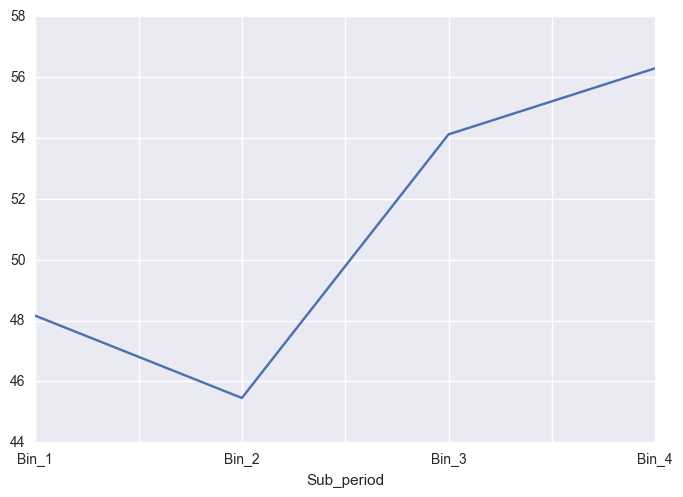

In [97]:
df_telecom_final.groupby('Sub_period').apply(lambda x: x.AGE.mean()).plot()

#### subscription period increases with age

In [98]:
pd.crosstab(df_telecom_final.Sub_period,df_telecom_final.SERVICE_PLAN)

SERVICE_PLAN,Basic,Basic_Ltd,Elite,Home,Power15,Power150,Pro,Professional,Professional Plus,Proplus,SO
Sub_period,,,,,,,,,,,
Bin_1,929,898,3464,1307,494,379,790,629,404,901,941
Bin_2,953,1033,2287,1052,129,867,970,137,99,1031,229
Bin_3,2,3,12,4,1,0,2,11,2,2,13
Bin_4,1,0,5,2,0,0,1,3,0,1,1


### Most Used Service Plan Is Elite

In [99]:
pd.crosstab(df_telecom_final.Sub_period,df_telecom_final.CHURN)

CHURN,0,1
Sub_period,,
Bin_1,3050,8086
Bin_2,6939,1848
Bin_3,0,52
Bin_4,0,14


### Customers with subscription period between 805 - 1610 days should be the target customers and should be provided with offers to sustain retention

In [105]:
pd.crosstab(df_telecom_final.SITE_TYPE_DESC,df_telecom_final.CHURN,)

CHURN,0,1
SITE_TYPE_DESC,,
Broadband Remote,7759,3887
Spaceway,2230,6113


### Customers using broadband are still active, therefore Broadband Services should be promoted

In [118]:
pd.crosstab(df_telecom_final.COMPUTER_OWNER ,df_telecom_final.CHURN)

CHURN,0,1
COMPUTER_OWNER,,
N,8866,6068
Y,1123,3932


### Customers who doesn't own computer are most inactive and then there are customers whos use services on other devices 

## Model Building

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
target=df_telecom_final.CHURN.values

In [122]:
df_telecom_final.drop('CHURN',axis=1,inplace=True)

In [123]:
df_telecom_final_dummy=pd.get_dummies(df_telecom_final,drop_first=True)

In [124]:
df_telecom_final_dummy.head()

,AGE,COMPUTER_OWNER_Y,DIRECT_INDIRECT_CHANNEL_Direct,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_GOOD,GENDER_2.0,INCOME_1,INCOME_2,INCOME_3,INCOME_4,...,STATE_ UT,STATE_ VA,STATE_ VT,STATE_ WA,STATE_ WI,STATE_ WV,STATE_ WY,Sub_period_Bin_2,Sub_period_Bin_3,Sub_period_Bin_4
0,69,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,58,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,22,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,36,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
sc=StandardScaler()

In [132]:
from sklearn.cross_validation import train_test_split,cross_val_score,cross_val_predict

In [133]:
x_train,x_test,y_train,y_test=train_test_split(df_telecom_final_dummy,target,train_size=.8)

In [134]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15991, 279), (3998, 279), (15991L,), (3998L,))

In [135]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [136]:
lr=LogisticRegression()

In [137]:
lr.fit(x_train_sc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
cross_val_score(cv=5,estimator=lr,X=x_train_sc,y=y_train,scoring='mean_squared_error')

array([-0.03438575, -0.03000938, -0.03314572, -0.03064415, -0.02627463])

In [140]:
from sklearn.metrics import classification_report,confusion_matrix

In [143]:
confusion_matrix(y_pred=lr.predict(x_train_sc),y_true=y_train)

array([[7729,  223],
       [ 213, 7826]])

In [159]:
print "Classification Report - Test Set \n"
print classification_report(y_pred=lr.predict(x_test_sc),y_true=y_test)

Classification Report - Test Set 

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2037
          1       0.97      0.97      0.97      1961

avg / total       0.97      0.97      0.97      3998



In [160]:
print "\n CONFUSION MATRIX \n"
confusion_matrix(y_pred=lr.predict(x_test_sc),y_true=y_test)


 CONFUSION MATRIX 



array([[1978,   59],
       [  51, 1910]])

In [161]:
pd.DataFrame(lr.coef_,columns=df_telecom_final_dummy.columns).T.sort_values(by=0,ascending=False)

,0
SATELLITE_SPACEWAY3,2.000824
SERVICE_PLAN_Professional,1.878556
SALES_SOURCE_Red Ventures LLC (SA),1.673372
SERVICE_PLAN_SO,1.597115
SATELLITE_SM6-HOR-10K,1.539850
SATELLITE_G3C-VER-24K,1.440684
SALES_SOURCE_DialAmerica Marketing Inc (CC),1.279618
SATELLITE_G28-HOR-16K,1.264734
SERVICE_PLAN_Power15,1.248110
SATELLITE_HZN-HOR-8K,1.218882


## Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf_1=RandomForestClassifier(n_estimators=100)

In [164]:
rf_1.fit(x_train_sc,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
feature=pd.DataFrame(np.round((rf_1.feature_importances_),3),index=df_telecom_final_dummy.columns)
feature=feature.rename(columns={0:'IMP'})
feature.head()

,IMP
AGE,0.034
COMPUTER_OWNER_Y,0.040
DIRECT_INDIRECT_CHANNEL_Direct,0.004
DIRECT_INDIRECT_CHANNEL_Indirect,0.004
FEEDBACK_GOOD,0.023


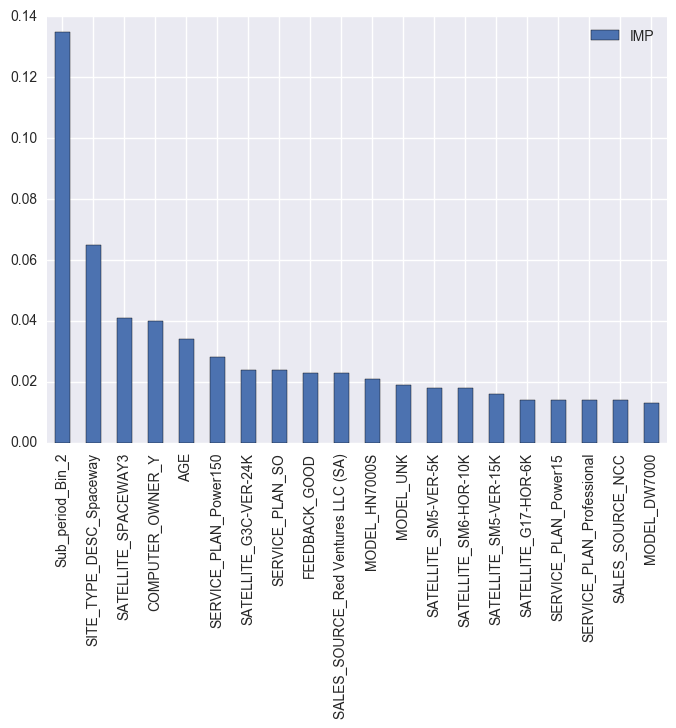

In [166]:
feature.sort_values(ascending=False,by='IMP')[:20].plot(kind='bar')

# Sub_period_bin_2 is a important feature

# Site_type_desc_spaceway is an important feature

In [167]:
print classification_report(y_pred=rf_1.predict(x_train_sc),y_true=y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7952
          1       1.00      1.00      1.00      8039

avg / total       1.00      1.00      1.00     15991



In [168]:
print classification_report(y_pred=rf_1.predict(x_test_sc),y_true=y_test)

             precision    recall  f1-score   support

          0       0.98      0.97      0.97      2037
          1       0.97      0.98      0.97      1961

avg / total       0.97      0.97      0.97      3998



In [169]:
print ("TEST SET \n")
confusion_matrix(y_pred=rf_1.predict(x_test_sc),y_true=y_test)

TEST SET 



array([[1970,   67],
       [  49, 1912]])

In [170]:
print ("TRAIN SET \n")
confusion_matrix(y_pred=rf_1.predict(x_train_sc),y_true=y_train)

TRAIN SET 



array([[7952,    0],
       [   0, 8039]])

# Clearly Random Forest Classifier is best model to select and features are to be selected as per importances